
Gendered Term Counts by Article

Article ID  Female Term Count  Male Term Count
         1                  7               53
         2                  3              118
         3                  3               43
         4                  3               61
         5                 29               80
         6                 69               16
         7                 45               25
         8                  2               15
         9                 25               57
        10                195               28
        11                  1                7
        12                  0                8
        13                  1                4
        14                  0                6
        15                  0                5
        16                  0                0
        17                  3                2
        18                  5                9
        19                 16                1
        20                

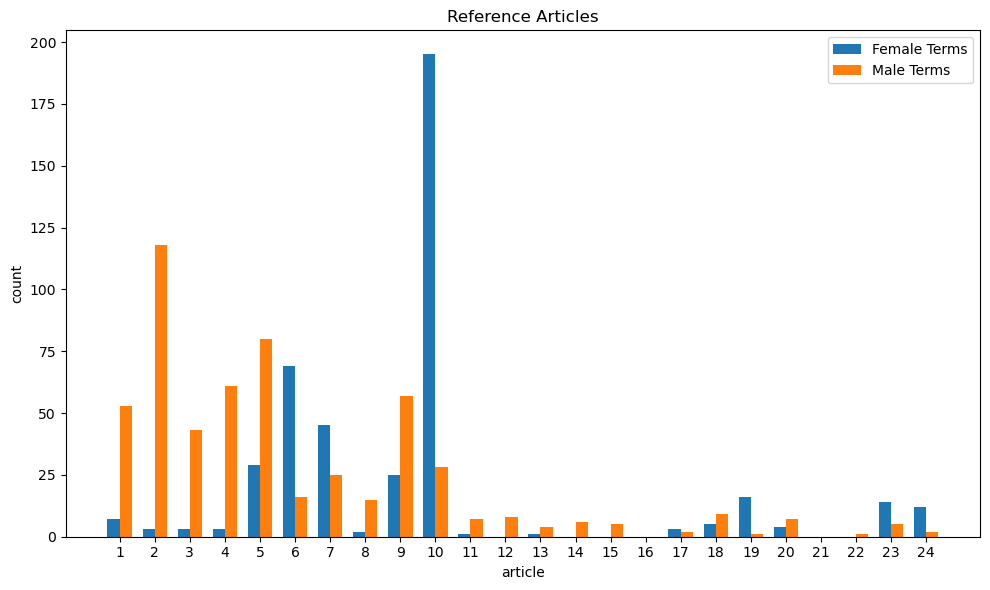

In [2]:
import ast
import re
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'reference_articles.json'

female_terms = [
    'she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl',
    'herself', 'female', 'sister', 'daughters', 'mothers', 'women',
    'girls', 'females', 'sisters', 'aunt', 'aunts', 'niece', 'nieces'
]
male_terms = [
    'he', 'son', 'his', 'him', 'father', 'man', 'boy', 'himself',
    'male', 'brother', 'sons', 'fathers', 'men', 'boys', 'males',
    'brothers', 'uncle', 'uncles', 'nephew', 'nephews'
]

#bc of the triple quotes, can't do json.load, parse it into a python dictionary with literal_eval. thank you chatgpt
with open(file_path, 'r', encoding='utf-8') as f:
    file_content = f.read()
articles = ast.literal_eval(file_content)

# regex for matching words, include word boundaries to only get the complete words. thank you google 
female_terms_pattern = re.compile(r'\b(' + '|'.join(female_terms) + r')\b', flags=re.IGNORECASE)
male_terms_pattern = re.compile(r'\b(' + '|'.join(male_terms) + r')\b', flags=re.IGNORECASE)

article_ids = []
female_counts = []
male_counts = []

for article_id, article_text in articles.items():
    f_count = len(female_terms_pattern.findall(article_text))
    m_count = len(male_terms_pattern.findall(article_text))
    
    article_ids.append(article_id)
    female_counts.append(f_count)
    male_counts.append(m_count)

counts_df = pd.DataFrame({
    "Article ID": article_ids,
    "Female Term Count": female_counts,
    "Male Term Count": male_counts
})

print("\nGendered Term Counts by Article\n")
print(counts_df.to_string(index=False))

#plotting time
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(article_ids))
ax.bar(x, female_counts, width=bar_width, label='Female Terms', align='center')
ax.bar([i + bar_width for i in x], male_counts, width=bar_width, label='Male Terms', align='center')
ax.set_xlabel('article')
ax.set_ylabel('count')
ax.set_title('Reference Articles')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(article_ids)
ax.legend()
plt.tight_layout()
plt.show()



 DeepSeek Articles - Gendered Term Counts 
Article ID  Female Term Count  Male Term Count
         1                  0                0
         2                  1                1
         3                  0                1
         4                  0                0
         5                  0                0
         6                  0                5
         7                  0                0
         8                  0                1
         9                  0                0
        10                  2                0
        11                  0                0
        12                  0                1
        13                  0                0
        14                  0                1
        15                  0                0
        16                  0                0
        17                  0                0
        18                  0                0
        19                  4                0
        20      

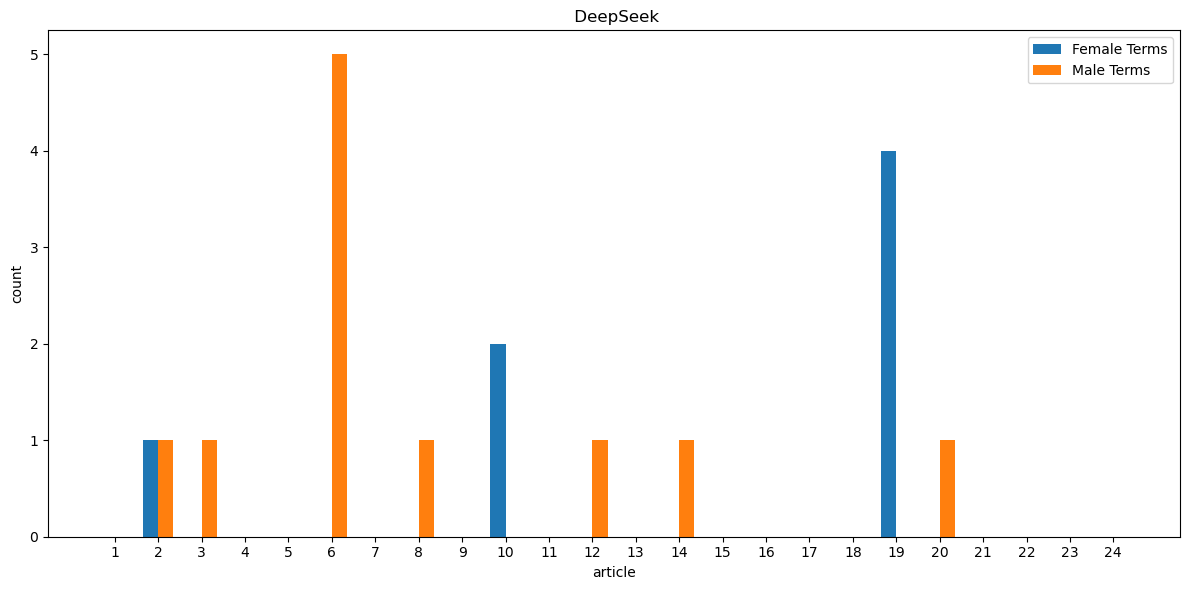


 Claude Articles - Gendered Term Counts 
Article ID  Female Term Count  Male Term Count
         1                  0                0
         2                  0                1
         3                  0                0
         4                  1                0
         5                  0                0
         6                  0                0
         7                  0                0
         8                  0                0
         9                  0                0
        10                  1                0
        11                  0                1
        12                  0                2
        13                  0                0
        14                  0                0
        15                  0                0
        16                  0                0
        17                  0                0
        18                  0                0
        19                  3                0
        20        

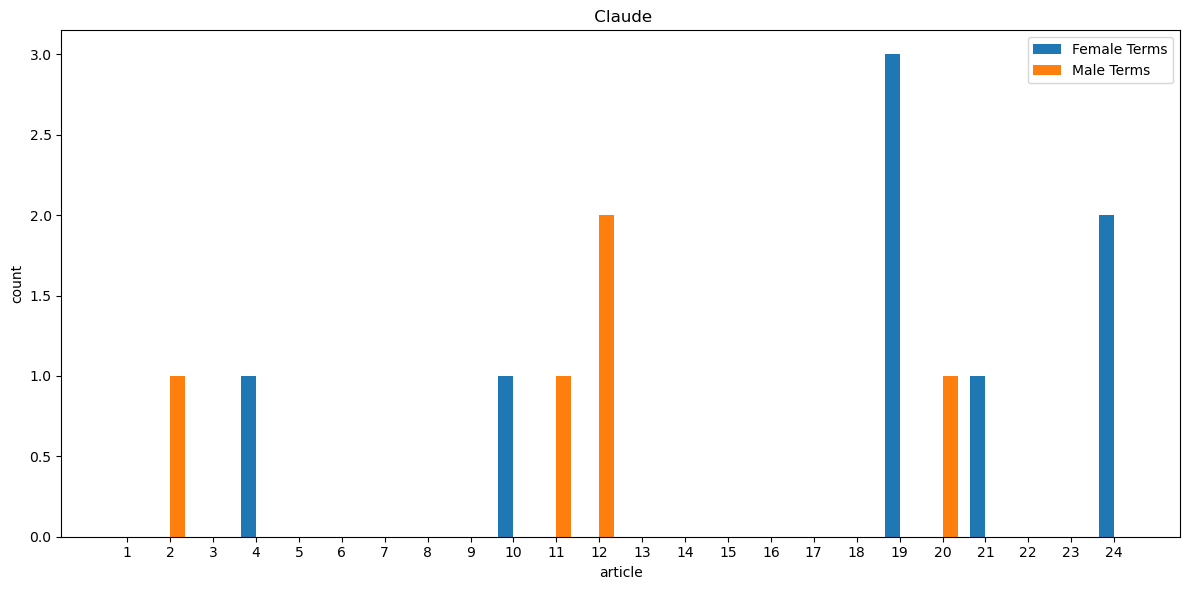


 ChatGPT Articles - Gendered Term Counts 
Article ID  Female Term Count  Male Term Count
         1                  0                0
         2                  0                0
         3                  0                0
         4                  0                0
         5                  0                0
         6                  0                4
         7                  0                0
         8                  0                7
         9                  0                0
        10                  0                0
        11                  0                1
        12                  0                2
        13                  0                0
        14                  0                0
        15                  0                0
        16                  0                0
        17                  0                0
        18                  0                0
        19                  3                0
        20       

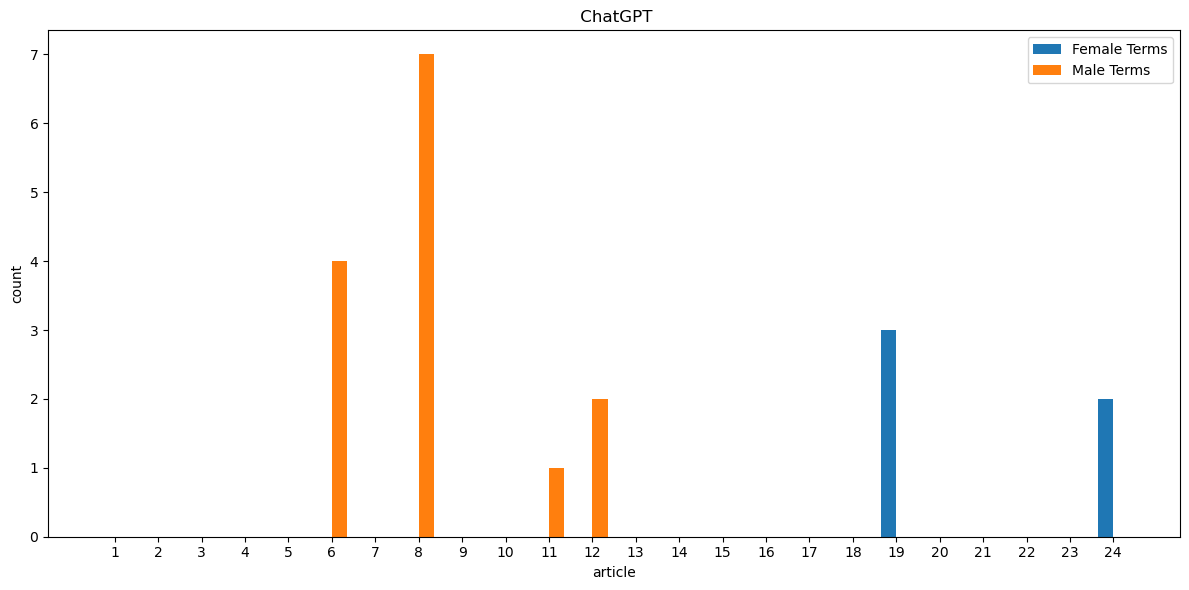

In [3]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt


deepseek_path = 'generated_articles/deepseek_articles.json'
claude_path = 'generated_articles/claude_articles.json'
chatgpt_path = 'generated_articles/chatgpt_articles.json'

female_terms = [
    'she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl',
    'herself', 'female', 'sister', 'daughters', 'mothers', 'women',
    'girls', 'females', 'sisters', 'aunt', 'aunts', 'niece', 'nieces'
]
male_terms = [
    'he', 'son', 'his', 'him', 'father', 'man', 'boy', 'himself',
    'male', 'brother', 'sons', 'fathers', 'men', 'boys', 'males',
    'brothers', 'uncle', 'uncles', 'nephew', 'nephews'
]

def load_articles(path):
    with open(path, 'r', encoding='utf-8') as f:
        return json.load(f)

deepseek_articles = load_articles(deepseek_path)
claude_articles = load_articles(claude_path)
chatgpt_articles = load_articles(chatgpt_path)

#to make sure only whole words are counted
female_terms_pattern = re.compile(r'\b(' + '|'.join(female_terms) + r')\b', flags=re.IGNORECASE)
male_terms_pattern = re.compile(r'\b(' + '|'.join(male_terms) + r')\b', flags=re.IGNORECASE)

def count_gendered_terms_per_article(articles):
    article_ids = []
    female_counts = []
    male_counts = []
    for article_id, text in articles.items():
        f_count = len(female_terms_pattern.findall(text))
        m_count = len(male_terms_pattern.findall(text))
        article_ids.append(article_id)
        female_counts.append(f_count)
        male_counts.append(m_count)
    return pd.DataFrame({
        'Article ID': article_ids,
        'Female Term Count': female_counts,
        'Male Term Count': male_counts
    })

deepseek_df = count_gendered_terms_per_article(deepseek_articles)
claude_df = count_gendered_terms_per_article(claude_articles)
chatgpt_df = count_gendered_terms_per_article(chatgpt_articles)

def plot_gendered_terms(df, model_name):
    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.35
    x = range(len(df))
    ax.bar(x, df['Female Term Count'], width=bar_width, label='Female Terms', align='center')
    ax.bar([i + bar_width for i in x], df['Male Term Count'], width=bar_width, label='Male Terms', align='center')
    ax.set_xlabel('article')
    ax.set_ylabel('count')
    ax.set_title(f' {model_name}')
    ax.set_xticks([i + bar_width/2 for i in x])
    ax.set_xticklabels(df['Article ID'])
    ax.legend()
    plt.tight_layout()
    plt.show()

print("\n DeepSeek Articles - Gendered Term Counts ")
print(deepseek_df.to_string(index=False))
plot_gendered_terms(deepseek_df, "DeepSeek")

print("\n Claude Articles - Gendered Term Counts ")
print(claude_df.to_string(index=False))
plot_gendered_terms(claude_df, "Claude")

print("\n ChatGPT Articles - Gendered Term Counts ")
print(chatgpt_df.to_string(index=False))
plot_gendered_terms(chatgpt_df, "ChatGPT")


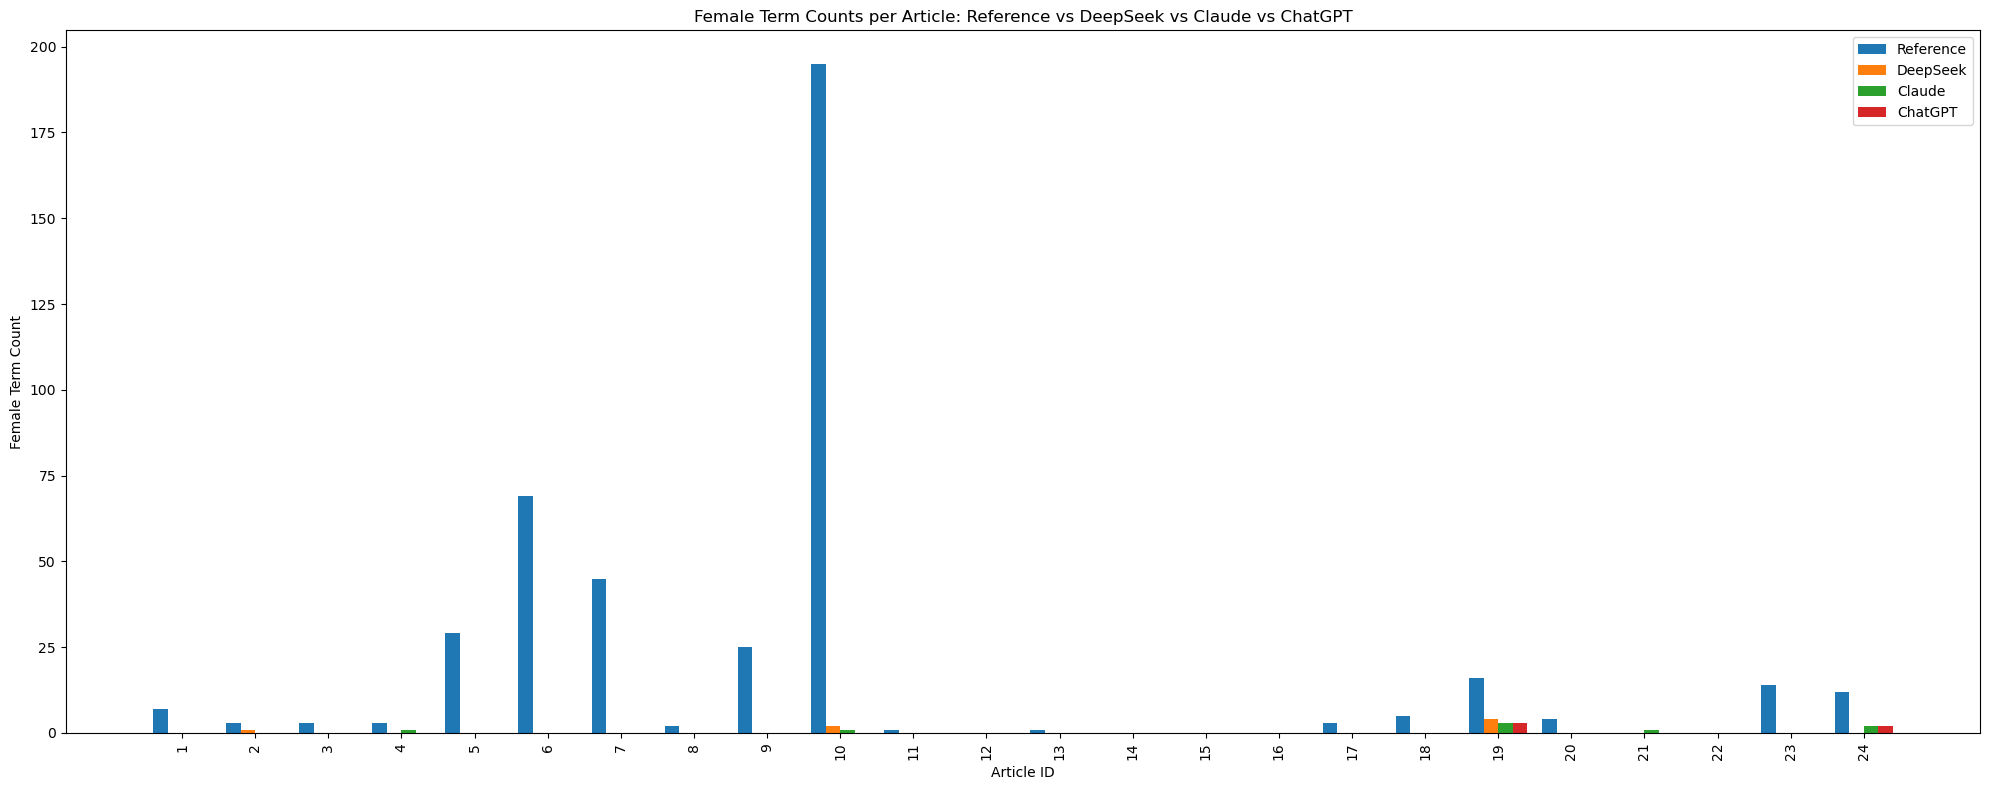

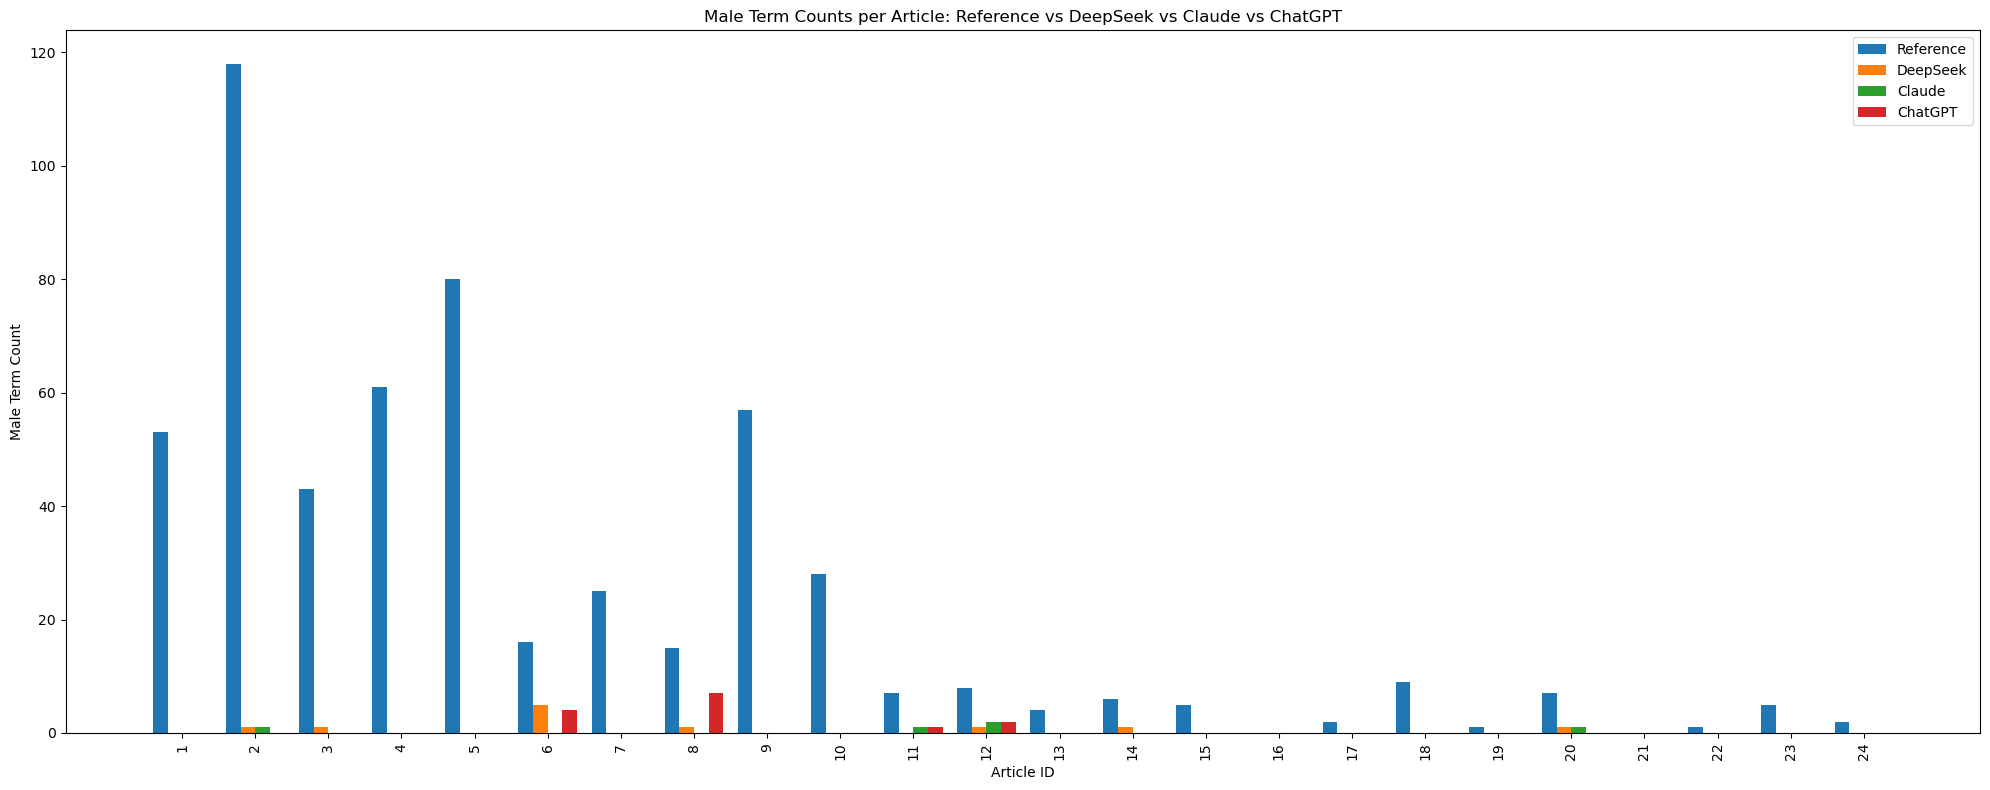

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Merge all data into one DataFrame for comparison

# First, make sure Article IDs are aligned and sorted the same way
reference_df = counts_df.sort_values('Article ID').reset_index(drop=True)
deepseek_df = deepseek_df.sort_values('Article ID').reset_index(drop=True)
claude_df = claude_df.sort_values('Article ID').reset_index(drop=True)
chatgpt_df = chatgpt_df.sort_values('Article ID').reset_index(drop=True)

# 2. Combine into a long format
records = []

for i in range(len(reference_df)):
    article_id = int(reference_df.loc[i, 'Article ID'])  # <- make sure it's treated numerically
    records.append({'Article ID': article_id, 'Model': 'Reference', 'Female Terms': reference_df.loc[i, 'Female Term Count'], 'Male Terms': reference_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'DeepSeek',  'Female Terms': deepseek_df.loc[i, 'Female Term Count'],  'Male Terms': deepseek_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'Claude',    'Female Terms': claude_df.loc[i, 'Female Term Count'],    'Male Terms': claude_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'ChatGPT',    'Female Terms': chatgpt_df.loc[i, 'Female Term Count'],    'Male Terms': chatgpt_df.loc[i, 'Male Term Count']})

full_df = pd.DataFrame(records)

# 3. Sort full_df properly
full_df = full_df.sort_values(['Article ID', 'Model']).reset_index(drop=True)

# Models and article IDs
models = ['Reference', 'DeepSeek', 'Claude', 'ChatGPT']
articles = sorted(full_df['Article ID'].unique())
bar_width = 0.2
group_width = bar_width * len(models)
x = range(len(articles))

# 4. Plot Female Terms only
fig, ax = plt.subplots(figsize=(20, 8))

for i, model in enumerate(models):
    subset = full_df[full_df['Model'] == model]
    ax.bar(
        [xi + i * bar_width for xi in x],
        subset['Female Terms'],
        width=bar_width,
        label=model
    )

ax.set_xlabel('Article ID')
ax.set_ylabel('Female Term Count')
ax.set_title('Female Term Counts per Article: Reference vs DeepSeek vs Claude vs ChatGPT')
ax.set_xticks([xi + group_width/2 - bar_width/2 for xi in x])
ax.set_xticklabels(articles)
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5. Plot Male Terms only
fig, ax = plt.subplots(figsize=(20, 8))

for i, model in enumerate(models):
    subset = full_df[full_df['Model'] == model]
    ax.bar(
        [xi + i * bar_width for xi in x],
        subset['Male Terms'],
        width=bar_width,
        label=model
    )

ax.set_xlabel('Article ID')
ax.set_ylabel('Male Term Count')
ax.set_title('Male Term Counts per Article: Reference vs DeepSeek vs Claude vs ChatGPT')
ax.set_xticks([xi + group_width/2 - bar_width/2 for xi in x])
ax.set_xticklabels(articles)
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


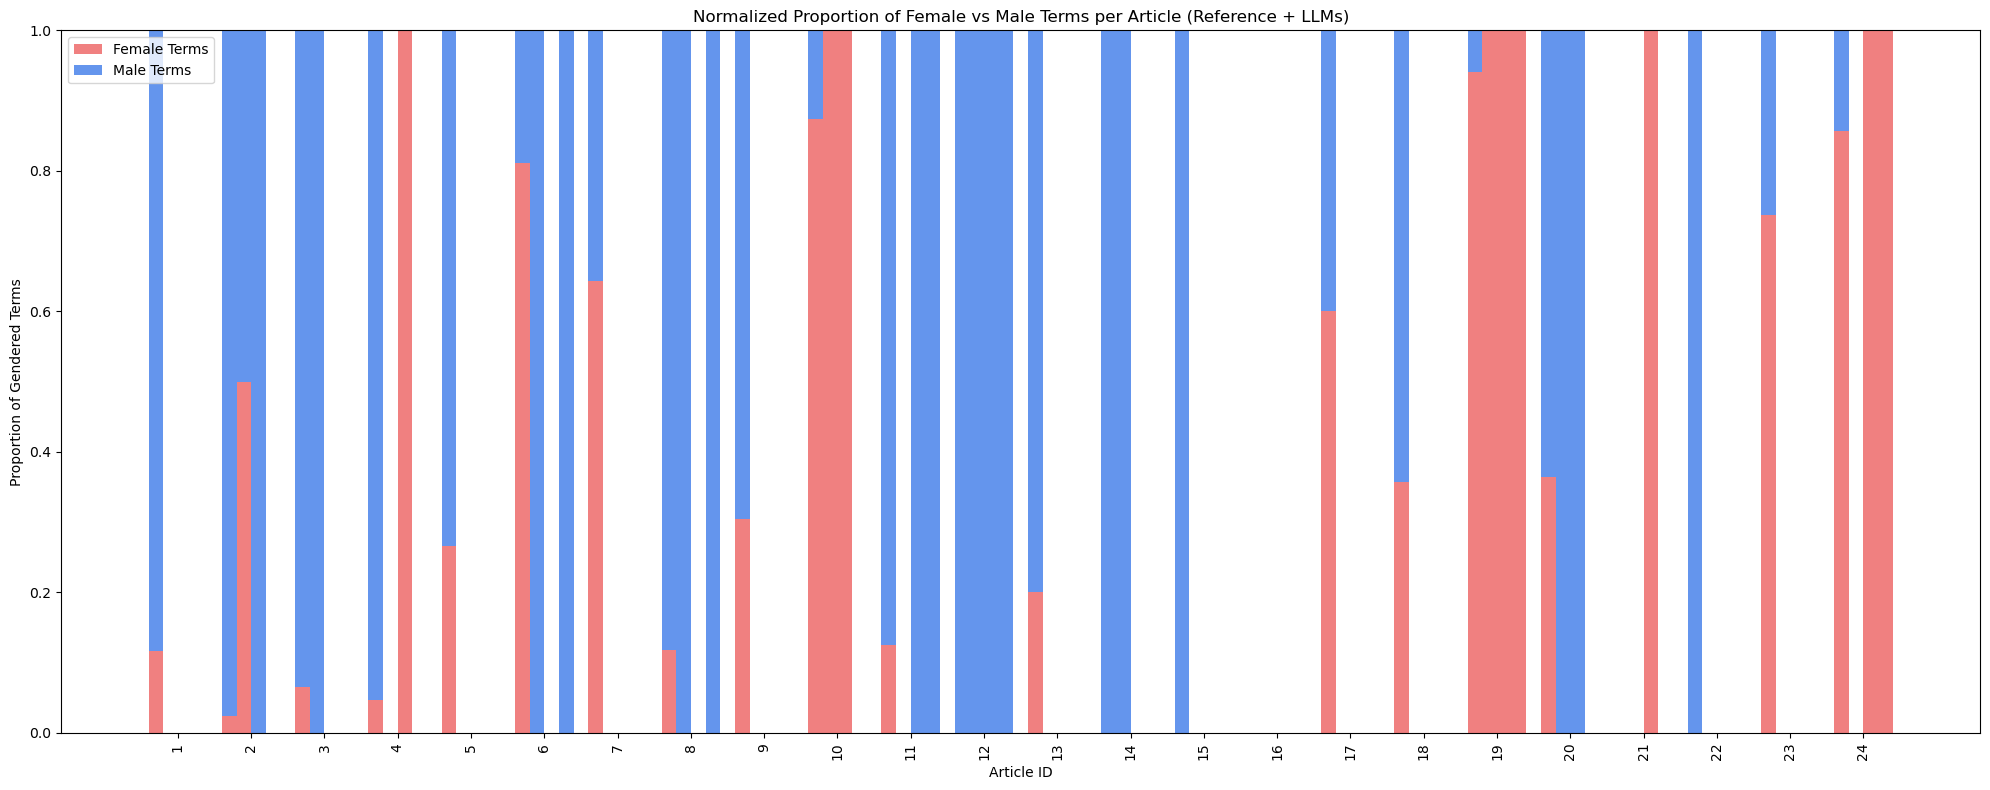

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge all again just to be safe
reference_df = counts_df.sort_values('Article ID').reset_index(drop=True)
deepseek_df = deepseek_df.sort_values('Article ID').reset_index(drop=True)
claude_df = claude_df.sort_values('Article ID').reset_index(drop=True)
chatgpt_df = chatgpt_df.sort_values('Article ID').reset_index(drop=True)

# Combine into a single dataframe
records = []

for i in range(len(reference_df)):
    article_id = int(reference_df.loc[i, 'Article ID'])  # ensure numerical
    records.append({'Article ID': article_id, 'Model': 'Reference', 'Female Terms': reference_df.loc[i, 'Female Term Count'], 'Male Terms': reference_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'DeepSeek',  'Female Terms': deepseek_df.loc[i, 'Female Term Count'],  'Male Terms': deepseek_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'Claude',    'Female Terms': claude_df.loc[i, 'Female Term Count'],    'Male Terms': claude_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'ChatGPT',    'Female Terms': chatgpt_df.loc[i, 'Female Term Count'],    'Male Terms': chatgpt_df.loc[i, 'Male Term Count']})

full_df = pd.DataFrame(records)

# Make sure sorted properly
full_df = full_df.sort_values(['Article ID', 'Model']).reset_index(drop=True)

# Calculate proportions
full_df['Total Terms'] = full_df['Female Terms'] + full_df['Male Terms']
full_df['Female Proportion'] = full_df['Female Terms'] / full_df['Total Terms']
full_df['Male Proportion'] = full_df['Male Terms'] / full_df['Total Terms']

# Handle divisions by zero safely
full_df['Female Proportion'] = full_df['Female Proportion'].fillna(0)
full_df['Male Proportion'] = full_df['Male Proportion'].fillna(0)

# Plot settings
models = ['Reference', 'DeepSeek', 'Claude', 'ChatGPT']
articles = sorted(full_df['Article ID'].unique())
bar_width = 0.2
group_width = bar_width * len(models)
x = range(len(articles))

# Plot normalized stacked bar plot
fig, ax = plt.subplots(figsize=(20, 8))

for i, model in enumerate(models):
    subset = full_df[full_df['Model'] == model]
    ax.bar(
        [xi + i * bar_width for xi in x],
        subset['Female Proportion'],
        width=bar_width,
        label=None if i else 'Female Terms',  # only label first time for legend
        color='lightcoral'
    )
    ax.bar(
        [xi + i * bar_width for xi in x],
        subset['Male Proportion'],
        width=bar_width,
        bottom=subset['Female Proportion'],
        label=None if i else 'Male Terms',  # only label first time for legend
        color='cornflowerblue'
    )

# Aesthetics
ax.set_xlabel('Article ID')
ax.set_ylabel('Proportion of Gendered Terms')
ax.set_title('Normalized Proportion of Female vs Male Terms per Article (Reference + LLMs)')
ax.set_xticks([xi + group_width/2 - bar_width/2 for xi in x])
ax.set_xticklabels(articles)
ax.legend(['Female Terms', 'Male Terms'])
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [6]:
#pip install textblob

In [7]:
def sentiment_df(path):
    from textblob import TextBlob
    # blob = TextBlob(text)
    # blob.sentiment.polarity, blob.sentiment.subjectivityblob

    with open(path, 'r', encoding='utf-8') as f:
        file_content = f.read()
    articles = ast.literal_eval(file_content)

    # regex for matching words, include word boundaries to only get the complete words. thank you google 
    female_terms_pattern = re.compile(r'\b(' + '|'.join(female_terms) + r')\b', flags=re.IGNORECASE)
    male_terms_pattern = re.compile(r'\b(' + '|'.join(male_terms) + r')\b', flags=re.IGNORECASE)

    # Function to analyze sentiment
    def analyze_sentiment(text):
        analysis = TextBlob(text)
        # if analysis.sentiment.polarity > 0.3:
        #     return 'Positive'
        # elif analysis.sentiment.polarity < -0.3:
        #     return 'Negative'
        # else:
        #     return 'Neutral'
        return analysis.sentiment.polarity

    # Process articles
    results = []
    for article_id, article_text in articles.items():
        sentences = re.split(r'(?<=[.!?]) +', article_text)  # Split into sentences
        for sentence in sentences:
            if female_terms_pattern.search(sentence) and male_terms_pattern.search(sentence):
                sentiment = analyze_sentiment(sentence)
                results.append({
                    'Article ID': article_id,
                    'Sentence': sentence,
                    'Female Sentiment': sentiment,
                    'Male Sentiment': sentiment
                })
            elif female_terms_pattern.search(sentence):
                sentiment = analyze_sentiment(sentence)
                results.append({
                    'Article ID': article_id,
                    'Sentence': sentence,
                    'Female Sentiment': sentiment,
                    'Male Sentiment': None
                })
            elif male_terms_pattern.search(sentence):
                sentiment = analyze_sentiment(sentence)
                results.append({
                    'Article ID': article_id,
                    'Sentence': sentence,
                    'Female Sentiment': None,
                    'Male Sentiment': sentiment
                })
            else:
                pass

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df


In [8]:
results_gpt = sentiment_df('generated_articles/nyt_chatgpt.json')
# results_claude = sentiment_df('generated_articles/claude_articles.json')
# results_deepseek = sentiment_df('generated_articles/deepseek_articles.json')
# results_ref = sentiment_df('reference_articles.json')

# print(results_gpt.groupby(['Article ID','Male Sentiment']).size().unstack(fill_value=0))
results_gpt

,Article ID,Sentence,Female Sentiment,Male Sentiment
0,5,**Barry Humphries (Dame Edna to You Possums) I...,NaN,0.325000
1,5,Humphries died peacefully surrounded by family...,NaN,0.246429
2,5,The flamboyant housewife with her signature li...,0.393750,0.393750
3,5,His work was celebrated for its clever social ...,NaN,0.231250
4,5,He received numerous accolades throughout his ...,NaN,0.175000
...,...,...,...,...
349,101,Her illustrious career has been marked by grou...,0.100000,NaN
350,101,Johnson's leadership has been instrumental in ...,0.367424,NaN
351,101,Her vision and dedication have helped the Danc...,0.216667,NaN
352,101,I am proud of what we have accomplished togeth...,0.377841,NaN


In [9]:
# Calculate the average male and female sentiment in the results_gpt DataFrame
average_female_sentiment_gpt = results_gpt['Female Sentiment'].mean()
average_male_sentiment_gpt = results_gpt['Male Sentiment'].mean()

print(f"Average Female Sentiment: {average_female_sentiment_gpt}")
print(f"Average Male Sentiment: {average_male_sentiment_gpt}")

Average Female Sentiment: 0.1565079972171772
Average Male Sentiment: 0.1600810345853824


In [10]:
# results_gpt.groupby(['Article ID','Female Sentiment']).size().unstack(fill_value=0)

results_claude = sentiment_df('generated_articles/nyt_claude.json')

# Calculate the average male and female sentiment in the results_gpt DataFrame
average_female_sentiment_claude = results_claude['Female Sentiment'].mean()
average_male_sentiment_claude = results_claude['Male Sentiment'].mean()

print(f"Average Female Sentiment: {average_female_sentiment_claude}")
print(f"Average Male Sentiment: {average_male_sentiment_claude}")

Average Female Sentiment: 0.15625645891347967
Average Male Sentiment: 0.1365550835684979


In [11]:
results_deepseek = sentiment_df('generated_articles/nyt_deepseek.json')

# Calculate the average male and female sentiment in the results_gpt DataFrame
average_female_sentiment_deepeek = results_deepseek['Female Sentiment'].mean()
average_male_sentiment_deepseek = results_deepseek['Male Sentiment'].mean()

print(f"Average Female Sentiment: {average_female_sentiment_deepeek}")
print(f"Average Male Sentiment: {average_male_sentiment_deepseek}")


Average Female Sentiment: 0.08841339370997013
Average Male Sentiment: 0.11746230584813264


In [12]:
results_ref = sentiment_df('nyt_ref_articles.json')
# print(results_deepseek.groupby(['Article ID','Male Sentiment']).size().unstack(fill_value=0))

# Calculate the average male and female sentiment in the results_gpt DataFrame
average_female_sentiment_ref = results_ref['Female Sentiment'].mean()
average_male_sentiment_ref = results_ref['Male Sentiment'].mean()

print(f"Average Female Sentiment: {average_female_sentiment_ref}")
print(f"Average Male Sentiment: {average_male_sentiment_ref}")


Average Female Sentiment: 0.11155042627360899
Average Male Sentiment: 0.09212123905526572


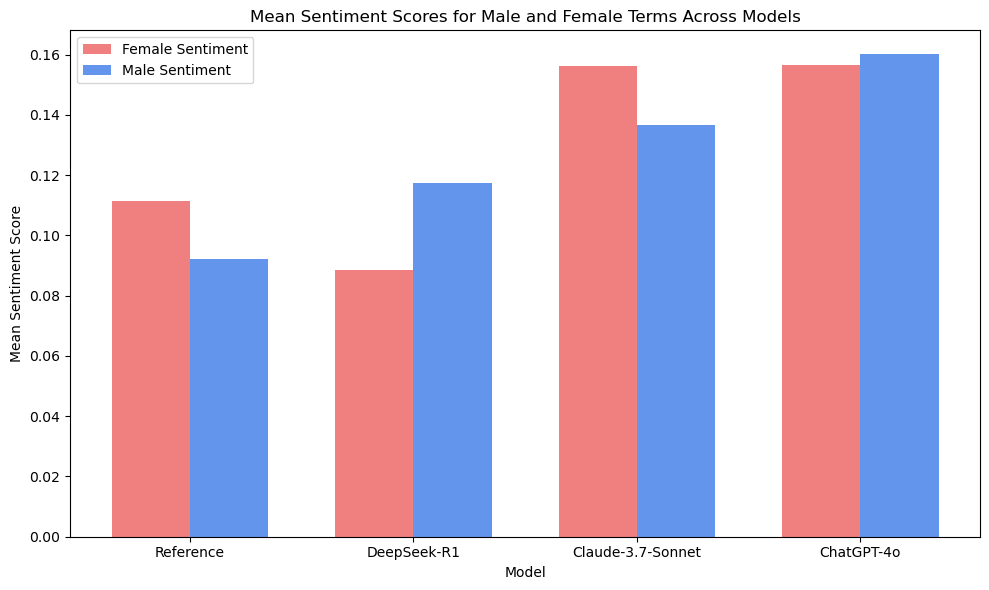

In [13]:
import pandas as pd

import matplotlib.pyplot as plt

# Calculate mean sentiment scores for each model
mean_sentiments = {
    'Model': ['Reference', 'DeepSeek-R1', 'Claude-3.7-Sonnet', 'ChatGPT-4o'],
    'Mean Female Sentiment': [
        results_ref['Female Sentiment'].mean(),
        results_deepseek['Female Sentiment'].mean(),
        results_claude['Female Sentiment'].mean(),
        results_gpt['Female Sentiment'].mean()
    ],
    'Mean Male Sentiment': [
        results_ref['Male Sentiment'].mean(),
        results_deepseek['Male Sentiment'].mean(),
        results_claude['Male Sentiment'].mean(),
        results_gpt['Male Sentiment'].mean()
    ]
}

# Convert to DataFrame
mean_sentiments_df = pd.DataFrame(mean_sentiments)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(mean_sentiments_df))

# Female sentiment bars
ax.bar(x, mean_sentiments_df['Mean Female Sentiment'], width=bar_width, label='Female Sentiment', color='lightcoral')

# Male sentiment bars
ax.bar([i + bar_width for i in x], mean_sentiments_df['Mean Male Sentiment'], width=bar_width, label='Male Sentiment', color='cornflowerblue')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Mean Sentiment Score')
ax.set_title('Mean Sentiment Scores for Male and Female Terms Across Models')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(mean_sentiments_df['Model'])
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

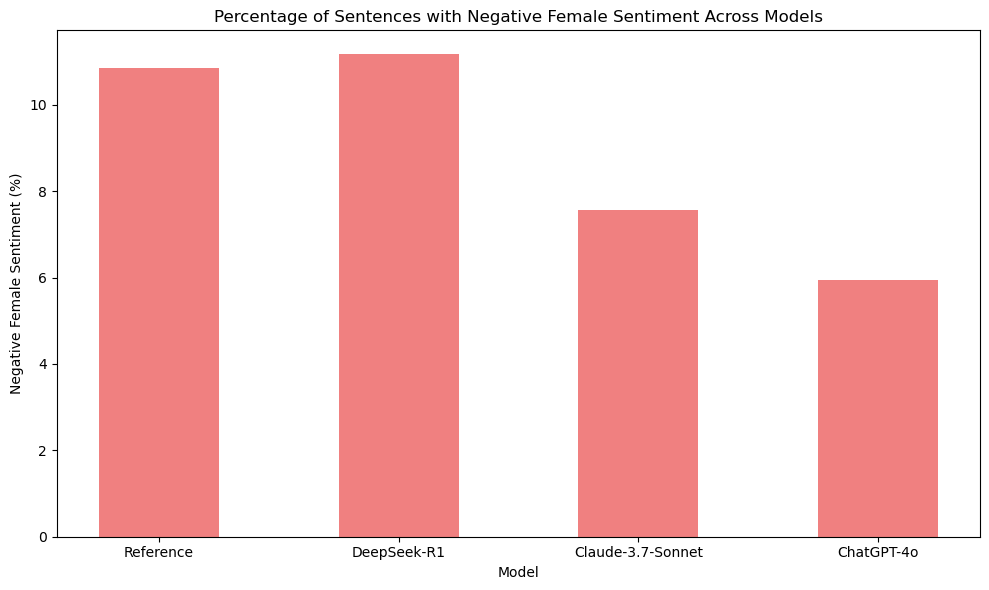

In [18]:
import matplotlib.pyplot as plt

# Calculate the percentage of sentences with negative female sentiment for each model
negative_female_sentiment_percentages = {
    'Model': ['Reference', 'DeepSeek-R1', 'Claude-3.7-Sonnet', 'ChatGPT-4o'],
    'Negative Female Sentiment (%)': [
        (results_ref['Female Sentiment'] < 0).mean() * 100,
        (results_deepseek['Female Sentiment'] < 0).mean() * 100,
        (results_claude['Female Sentiment'] < 0).mean() * 100,
        (results_gpt['Female Sentiment'] < 0).mean() * 100
    ]
}

# Convert to DataFrame
negative_female_sentiment_df = pd.DataFrame(negative_female_sentiment_percentages)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.5
x = range(len(negative_female_sentiment_df))

# Negative female sentiment bars
ax.bar(x, negative_female_sentiment_df['Negative Female Sentiment (%)'], width=bar_width, color='lightcoral')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Negative Female Sentiment (%)')
ax.set_title('Percentage of Sentences with Negative Female Sentiment Across Models')
ax.set_xticks(x)
ax.set_xticklabels(negative_female_sentiment_df['Model'])

# Display the plot
plt.tight_layout()
plt.show()

Below is old stuff for sentiment 

In [15]:
import ast
import re
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import json

file_path = 'generated_articles/nyt_chatgpt.json'

female_terms = [
    'she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl',
    'herself', 'female', 'sister', 'daughters', 'mothers', 'women',
    'girls', 'females', 'sisters', 'aunt', 'aunts', 'niece', 'nieces'
]
male_terms = [
    'he', 'son', 'his', 'him', 'father', 'man', 'boy', 'himself',
    'male', 'brother', 'sons', 'fathers', 'men', 'boys', 'males',
    'brothers', 'uncle', 'uncles', 'nephew', 'nephews'
]

#bc of the triple quotes, can't do json.load, parse it into a python dictionary with literal_eval. thank you chatgpt
with open(file_path, 'r', encoding='utf-8') as f:
    file_content = f.read()
articles = ast.literal_eval(file_content)

# regex for matching words, include word boundaries to only get the complete words. thank you google 
female_terms_pattern = re.compile(r'\b(' + '|'.join(female_terms) + r')\b', flags=re.IGNORECASE)
male_terms_pattern = re.compile(r'\b(' + '|'.join(male_terms) + r')\b', flags=re.IGNORECASE)

# Function to analyze sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.3:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.3:
        return 'Negative'
    else:
        return 'Neutral'

# Process articles
results = []
for article_id, article_text in articles.items():
    sentences = re.split(r'(?<=[.!?]) +', article_text)  # Split into sentences
    for sentence in sentences:
        if female_terms_pattern.search(sentence) and male_terms_pattern.search(sentence):
            sentiment = analyze_sentiment(sentence)
            results.append({
                'Article ID': article_id,
                'Sentence': sentence,
                'Female Sentiment': sentiment,
                'Male Sentiment': sentiment
            })
        elif female_terms_pattern.search(sentence):
            sentiment = analyze_sentiment(sentence)
            results.append({
                'Article ID': article_id,
                'Sentence': sentence,
                'Female Sentiment': sentiment,
                'Male Sentiment': None
            })
        elif male_terms_pattern.search(sentence):
            sentiment = analyze_sentiment(sentence)
            results.append({
                'Article ID': article_id,
                'Sentence': sentence,
                'Female Sentiment': None,
                'Male Sentiment': sentiment
            })
        else:
            pass

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Count sentiment categories
sentiment_counts = results_df.groupby(['Article ID','Male Sentiment']).size().unstack(fill_value=0)

print("\nSentiment Analysis of Gendered Sentences by Article\n")
print(sentiment_counts)

# Save results to a CSV file
results_df.to_csv('gendered_sentences_sentiment.csv', index=False)


Sentiment Analysis of Gendered Sentences by Article

Male Sentiment  Negative  Neutral  Positive
Article ID                                 
10                     0        0         1
100                    0        4         1
12                     1        2         0
18                     0        1         0
20                     0        2         0
22                     0        2         0
23                     0        0         1
24                     0        7         1
27                     0        1         0
35                     0        0         1
36                     0        4         0
37                     0        1         0
41                     0        1         0
42                     0        2         0
43                     0        7         0
44                     0        1         0
46                     0        1         0
5                      0        5         2
6                      0        2         0
68                    

In [16]:
# Count sentiment categories
sentiment_counts = results_df.groupby(['Article ID','Female Sentiment']).size().unstack(fill_value=0)

print("\nSentiment Analysis of Gendered Sentences by Article\n")
print(sentiment_counts)


Sentiment Analysis of Gendered Sentences by Article

Female Sentiment  Negative  Neutral  Positive
Article ID                                   
10                       0        5         0
101                      0        4         3
11                       0        6         1
14                       0        3         4
16                       0        2         0
17                       0        0         1
18                       0        1         0
19                       0        6         0
23                       0        4         1
28                       0        8         0
29                       0        9         0
31                       0        5         1
32                       0        1         0
33                       0        0         1
39                       0        1         0
40                       0        6         0
42                       0        0         1
43                       0        1         0
44                       0